# This notebook visualizes the encoded data from autoencoder, denoising autoencoder, sparse autoencoder, RBMs that are trained with edge detection.

# Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/') # mount google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
import os
encoded_data_base_dir = os.path.join('/content/gdrive/My Drive/acse9/data/','encoded_data') # the base directory of encoded data  
if not os.path.exists(encoded_data_base_dir):
    print('Error! The directory does not exist!')
else:
    print('Encoded data folder exists. Safe to continue.')

Encoded data folder exists. Safe to continue.


In [ ]:
!ls '/content/gdrive/My Drive/acse9/data/encoded_data' # list all encoded data in drive

encoded_data_basic_autoencoder.npz
encoded_data_denoising_autoencoder_0_5.npz
encoded_data_rbm.npz
encoded_data_sparse_autoencoder_0_001.npz
encoded_data_stacked_rbms.npz


# Load all encoded data

In [ ]:
import glob
import numpy as np

In [ ]:
# get the directory list of encoded data
encoded_data_path = os.path.join(encoded_data_base_dir,'*.npz')

# get the path of basic autoencoder data
basic_autoencoder_encoded_path = os.path.join(encoded_data_base_dir,'*basic*autoencoder*.npz')
basic_autoencoder_encoded_lst = glob.glob(basic_autoencoder_encoded_path)
encoded_data_lst = glob.glob(encoded_data_path)
#print(encoded_data_lst)
print(basic_autoencoder_encoded_lst)

# get the path of denoising autoencoder data
denoising_autoencoder_encoded_path = os.path.join(encoded_data_base_dir,'*denoising*autoencoder*.npz')
denoising_autoencoder_encoded_lst = glob.glob(denoising_autoencoder_encoded_path)
print(denoising_autoencoder_encoded_lst)

# get the path of sparse autoencoder data
sparse_autoencoder_encoded_path = os.path.join(encoded_data_base_dir,'*sparse*autoencoder*.npz')
sparse_autoencoder_encoded_lst = glob.glob(sparse_autoencoder_encoded_path)
print(sparse_autoencoder_encoded_lst)

# get the path of rbm data
rbm_encoded_path = os.path.join(encoded_data_base_dir,'*rbm.npz')
rbm_encoded_lst = glob.glob(rbm_encoded_path)
print(rbm_encoded_lst)

# get the path of stacked rbm data
stacked_rbms_encoded_path = os.path.join(encoded_data_base_dir,'*stacked*rbms*.npz')
stacked_rbms_encoded_lst = glob.glob(stacked_rbms_encoded_path)
print(stacked_rbms_encoded_lst)


['/content/gdrive/My Drive/acse9/data/encoded_data/encoded_data_basic_autoencoder.npz']
['/content/gdrive/My Drive/acse9/data/encoded_data/encoded_data_denoising_autoencoder_0_5.npz']
['/content/gdrive/My Drive/acse9/data/encoded_data/encoded_data_sparse_autoencoder_0_001.npz']
['/content/gdrive/My Drive/acse9/data/encoded_data/encoded_data_rbm.npz']
['/content/gdrive/My Drive/acse9/data/encoded_data/encoded_data_stacked_rbms.npz']


In [ ]:
def load_encoded_data(path_lst):
    """
    This function loads the encoded data according to the path list
    """
    filenames = []
    all_encoded_data = []
    for i in path_lst:
        data = np.load(i,'r')['data'] # unzip the npy array and load the encoded data
        all_encoded_data.append(data)
    return all_encoded_data

In [ ]:
all_encoded_data = load_encoded_data(encoded_data_lst)  # gather all the data from all different models
basic_autoencoder_data = load_encoded_data(basic_autoencoder_encoded_lst)  # gather data from basic autoencoder 
denoising_autoencoder_data = load_encoded_data(denoising_autoencoder_encoded_lst) # gather data from denoising autoencoder
sparse_autoencoder_data = load_encoded_data(sparse_autoencoder_encoded_lst) # gather data from sparse autoencoder
rbm_data = load_encoded_data(rbm_encoded_lst)  # gather data from rbm
stacked_rbms_data = load_encoded_data(stacked_rbms_encoded_lst) # gather data from stacked RBMs

# Use Kmeans-Elbow to visually inspect how well the encoded data can be clustered

In [ ]:
# importing modules
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [ ]:
# guided by https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
import matplotlib.pyplot as plt

def K_means_elbow(encoded_data):
     """
    This function plots the distortion score vs the number of clusters
    """
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 

    K = range(1,12) # the range of k we want to inspect
    X = encoded_data

    for k in K: 
    #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k).fit(X) 
        kmeanModel.fit(X)     
      
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
        inertias.append(kmeanModel.inertia_) 
  
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
        mapping2[k] = kmeanModel.inertia_ 
    return distortions

Text(0, 0.5, 'Distortion')

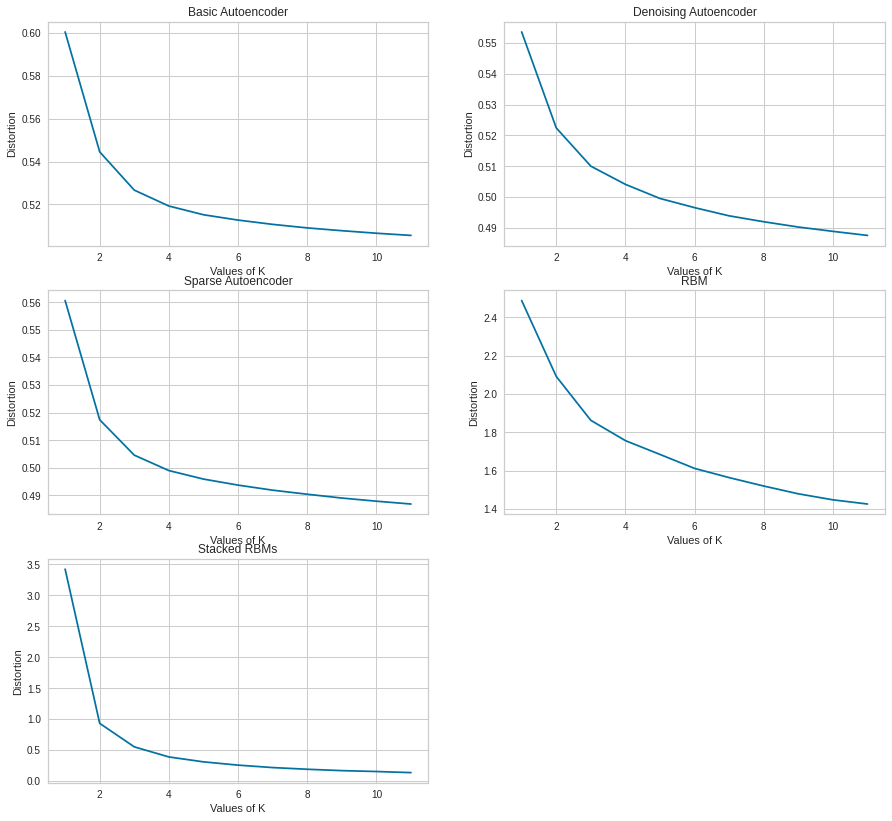

In [ ]:
fig = plt.figure(figsize=(15, 14))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
"""
Plot the distortion scores vs number of clusters the range of k is (1,12)
"""
K = range(1,12)
ax1.plot(K,K_means_elbow(basic_autoencoder_data[0]))
ax1.set_title('Basic Autoencoder')
ax1.set_xlabel('Values of K')
ax1.set_ylabel('Distortion')

ax2.plot(K,K_means_elbow(denoising_autoencoder_data[0]))
ax2.set_title('Denoising Autoencoder')
ax2.set_xlabel('Values of K')
ax2.set_ylabel('Distortion')

ax3.plot(K,K_means_elbow(sparse_autoencoder_data[0]))
ax3.set_title('Sparse Autoencoder')
ax3.set_xlabel('Values of K')
ax3.set_ylabel('Distortion')

ax4.plot(K,K_means_elbow(rbm_data[0]))
ax4.set_title('RBM')
ax4.set_xlabel('Values of K')
ax4.set_ylabel('Distortion')

ax5.plot(K,K_means_elbow(stacked_rbms_data[0]))
ax5.set_title('Stacked RBMs')
ax5.set_xlabel('Values of K')
ax5.set_ylabel('Distortion')

# Plotting the dendrogram of encoded data to inspect how well the data can be clustered

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

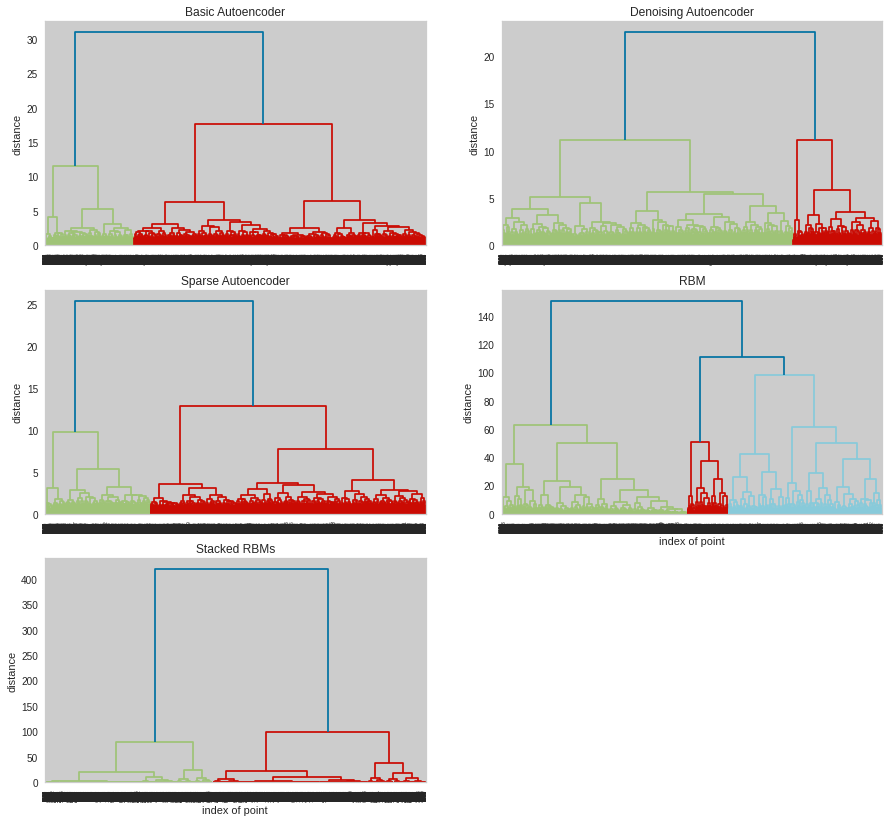

In [ ]:
fig = plt.figure(figsize=(15, 14))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)


# plot the dendrogram of basic autoencoder
linked_basic_autoencoder = linkage(basic_autoencoder_data[0], 'ward')
dendrogram(linked_basic_autoencoder,ax = ax1,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True)
ax1.set_title('Basic Autoencoder')
ax1.set_ylabel('distance')

# plot the dendrogram of denoising autoencoder
linked_denoising_autoencoder = linkage(denoising_autoencoder_data[0], 'ward')
dendrogram(linked_denoising_autoencoder,ax = ax2,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True)
ax2.set_title('Denoising Autoencoder')
ax2.set_ylabel('distance')

# plot the dendrogram of sparse autoencoder
linked_sparse_autoencoder = linkage(sparse_autoencoder_data[0], 'ward')
dendrogram(linked_sparse_autoencoder,ax = ax3,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True)
ax3.set_title('Sparse Autoencoder')
ax3.set_ylabel('distance')

# plot the dendrogram of RBM
linked_rbm = linkage(rbm_data[0], 'ward')
dendrogram(linked_rbm,ax = ax4,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True)
ax4.set_title('RBM')
ax4.set_xlabel('index of point')
ax4.set_ylabel('distance')

# plot the dendrogram of stacked RBMs
linked_stacked_rbms = linkage(stacked_rbms_data[0], 'ward')
dendrogram(linked_stacked_rbms,ax = ax5,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True)
ax5.set_title('Stacked RBMs')
ax5.set_xlabel('index of point')
ax5.set_ylabel('distance')
plt.show()

# Ensemble results of models and visualize

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
def clustering (encoded_data,n_clusters,clustering_method='HAC'):
    """
    This function clusters the encoded data into the number of clusters specified by n_clusters 
    Attribute: 
    n_clusters: number of clusters
    clustering_method: options are 'HAC' or 'K-means', 'HAC' is the default value
    """
    if clustering_method == 'HAC':
        hac_model = AgglomerativeClustering(n_clusters,affinity='euclidean',linkage='ward') # if the linkage is ward, affinity has to be euclidean
        clustering = hac_model.fit(encoded_data)
        labels = clustering.labels_
    if clustering_method == 'K-means':
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(encoded_data)
        labels = kmeans.labels_
    return labels

In [ ]:
def visualization_clusters_models(n_clusters,clustering_method='HAC',visualization_method='PCA'):
    """
    This function clusters the encoded data into the number of clusters specified by n_clusters and visualize the clusters
    Attribute: 
    n_clusters: number of clusters
    clustering_method: options are 'HAC' or 'K-means', 'HAC' is the default value
    visualization_method: options are 'PCA' and 'TSNE'. 'PCA' is the default value
    """
    if clustering_method=='HAC':
        labels_basic_autoencoder = clustering(basic_autoencoder_data[0],n_clusters)
        labels_denoising_autoencoder = clustering(denoising_autoencoder_data[0],n_clusters)
        labels_sparse_autoencoder = clustering(sparse_autoencoder_data[0],n_clusters)
        labels_rbm = clustering(rbm_data[0],n_clusters)
        labels_stacked_rbms = clustering(stacked_rbms_data[0],n_clusters)
    if clustering_method=='K-means':
        labels_basic_autoencoder = clustering(basic_autoencoder_data[0],n_clusters,'K-means')
        labels_denoising_autoencoder = clustering(denoising_autoencoder_data[0],n_clusters,'K-means')
        labels_sparse_autoencoder = clustering(sparse_autoencoder_data[0],n_clusters,'K-means')
        labels_rbm = clustering(rbm_data[0],n_clusters,'K-means')
        labels_stacked_rbms = clustering(stacked_rbms_data[0],n_clusters,'K-means')

    red_basic_autoencoder = labels_basic_autoencoder == 0
    green_basic_autoencoder = labels_basic_autoencoder == 1
    blue_basic_autoencoder = labels_basic_autoencoder == 2
    yellow_basic_autoencoder = labels_basic_autoencoder == 3
    

    red_denoising_autoencoder = labels_denoising_autoencoder == 0
    green_denoising_autoencoder = labels_denoising_autoencoder == 1
    blue_denoising_autoencoder = labels_denoising_autoencoder == 2
    yellow_denoising_autoencoder = labels_denoising_autoencoder == 3
    

    red_sparse_autoencoder = labels_sparse_autoencoder == 0
    green_sparse_autoencoder = labels_sparse_autoencoder == 1
    blue_sparse_autoencoder = labels_sparse_autoencoder == 2
    yellow_sparse_autoencoder = labels_sparse_autoencoder == 3
    

    red_rbm = labels_rbm == 0
    green_rbm = labels_rbm == 1
    blue_rbm = labels_rbm == 2 
    yellow_rbm = labels_rbm == 3
                    

    red_stacked_rbms = labels_stacked_rbms == 0
    green_stacked_rbms = labels_stacked_rbms == 1
    blue_stacked_rbms = labels_stacked_rbms == 2
    yellow_stacked_rbms = labels_stacked_rbms== 3
     
    fig = plt.figure(figsize=(15, 14))
    ax1 = fig.add_subplot(3,2,1)
    ax2 = fig.add_subplot(3,2,2)
    ax3 = fig.add_subplot(3,2,3)
    ax4 = fig.add_subplot(3,2,4)
    ax5 = fig.add_subplot(3,2,5)

    if visualization_method == 'PCA':
        pca = PCA(n_components=2)
        X_r_basic_autoencoder = pca.fit(basic_autoencoder_data[0]).transform(basic_autoencoder_data[0])
        X_r_denoising_autoencoder = pca.fit(denoising_autoencoder_data[0]).transform(denoising_autoencoder_data[0])
        X_r_sparse_autoencoder = pca.fit(sparse_autoencoder_data[0]).transform(sparse_autoencoder_data[0])
        X_r_rbm = pca.fit(rbm_data[0]).transform(rbm_data[0])
        X_r_stacked_rbms = pca.fit(stacked_rbms_data[0]).transform(stacked_rbms_data[0])
    else:
        X_r_basic_autoencoder = TSNE(n_components=2).fit_transform(basic_autoencoder_data[0])
        X_r_denoising_autoencoder = TSNE(n_components=2).fit_transform(denoising_autoencoder_data[0])
        X_r_sparse_autoencoder = TSNE(n_components=2).fit_transform(sparse_autoencoder_data[0])
        X_r_rbm = TSNE(n_components=2).fit_transform(rbm_data[0])
        X_r_stacked_rbms = TSNE(n_components=2).fit_transform(stacked_rbms_data[0])


    ax1.scatter(X_r_basic_autoencoder[red_basic_autoencoder, 0], X_r_basic_autoencoder[red_basic_autoencoder, 1], c="r",s=0.5,label='label 0')
    ax1.scatter(X_r_basic_autoencoder[green_basic_autoencoder, 0], X_r_basic_autoencoder[green_basic_autoencoder, 1], c="g",s=0.5,label = 'label 1')
    ax1.scatter(X_r_basic_autoencoder[blue_basic_autoencoder, 0], X_r_basic_autoencoder[blue_basic_autoencoder, 1], c="b",s=0.5,label = 'label 2')
    ax1.scatter(X_r_basic_autoencoder[yellow_basic_autoencoder, 0], X_r_basic_autoencoder[yellow_basic_autoencoder, 1], c="y",s=0.5,label = 'label 3')
    ax1.set_title('Basic Autoencoder')

    ax2.scatter(X_r_denoising_autoencoder[red_denoising_autoencoder, 0], X_r_denoising_autoencoder[red_denoising_autoencoder, 1], c="r",s=0.5,label='label 0')
    ax2.scatter(X_r_denoising_autoencoder[green_denoising_autoencoder, 0], X_r_denoising_autoencoder[green_denoising_autoencoder, 1], c="g",s=0.5,label = 'label 1')
    ax2.scatter(X_r_denoising_autoencoder[blue_denoising_autoencoder, 0], X_r_denoising_autoencoder[blue_denoising_autoencoder, 1], c="b",s=0.5,label = 'label 2')
    ax2.scatter(X_r_denoising_autoencoder[yellow_denoising_autoencoder, 0], X_r_denoising_autoencoder[yellow_denoising_autoencoder, 1], c="y",s=0.5,label = 'label 3')
    ax2.set_title('Denoising Autoencoder')

    ax3.scatter(X_r_sparse_autoencoder[red_sparse_autoencoder, 0], X_r_sparse_autoencoder[red_sparse_autoencoder, 1], c="r",s=0.5,label='label 0')
    ax3.scatter(X_r_sparse_autoencoder[green_sparse_autoencoder, 0], X_r_sparse_autoencoder[green_sparse_autoencoder, 1], c="g",s=0.5,label = 'label 1')
    ax3.scatter(X_r_sparse_autoencoder[blue_sparse_autoencoder, 0], X_r_sparse_autoencoder[blue_sparse_autoencoder, 1], c="b",s=0.5,label = 'label 2')
    ax3.scatter(X_r_sparse_autoencoder[yellow_sparse_autoencoder, 0], X_r_sparse_autoencoder[yellow_sparse_autoencoder, 1], c="y",s=0.5,label = 'label 3')
    ax3.set_title('Sparse Autoencoder')

    ax4.scatter(X_r_rbm[red_rbm, 0], X_r_rbm[red_rbm, 1], c="r",s=0.5,label='label 0')
    ax4.scatter(X_r_rbm[green_rbm, 0], X_r_rbm[green_rbm, 1], c="g",s=0.5,label = 'label 1')
    ax4.scatter(X_r_rbm[blue_rbm, 0], X_r_rbm[blue_rbm, 1], c="b",s=0.5,label = 'label 2')
    ax4.scatter(X_r_rbm[yellow_rbm, 0], X_r_rbm[yellow_rbm, 1], c="y",s=0.5,label = 'label 3')
    ax4.set_title('RBM')

    ax5.scatter(X_r_stacked_rbms[red_stacked_rbms, 0], X_r_stacked_rbms[red_stacked_rbms, 1], c="r",s=0.5,label='label 0')
    ax5.scatter(X_r_stacked_rbms[green_stacked_rbms, 0], X_r_stacked_rbms[green_stacked_rbms, 1], c="g",s=0.5,label = 'label 1')
    ax5.scatter(X_r_stacked_rbms[blue_stacked_rbms, 0], X_r_stacked_rbms[blue_stacked_rbms, 1], c="b",s=0.5,label = 'label 2')
    ax5.scatter(X_r_stacked_rbms[yellow_stacked_rbms, 0], X_r_stacked_rbms[yellow_stacked_rbms, 1], c="y",s=0.5,label = 'label 3')
    ax5.set_title('Stacked RBMs')

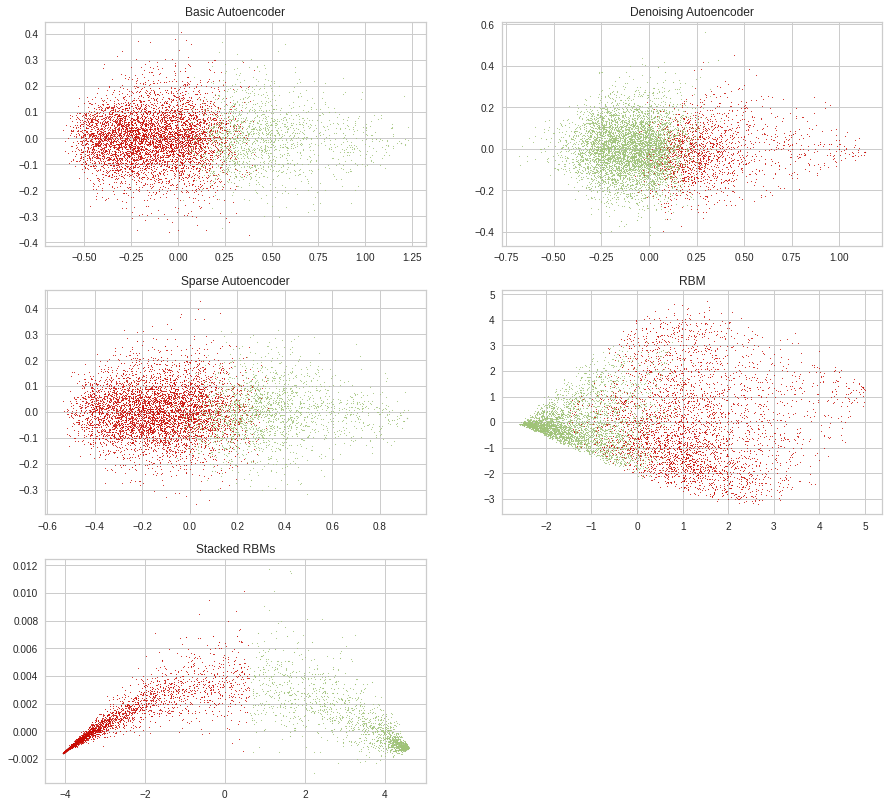

In [ ]:
visualization_clusters_models(2,clustering_method='HAC',visualization_method='PCA')    #  cluster the data into 2 groups by HAC and visualize the clusters by PCA

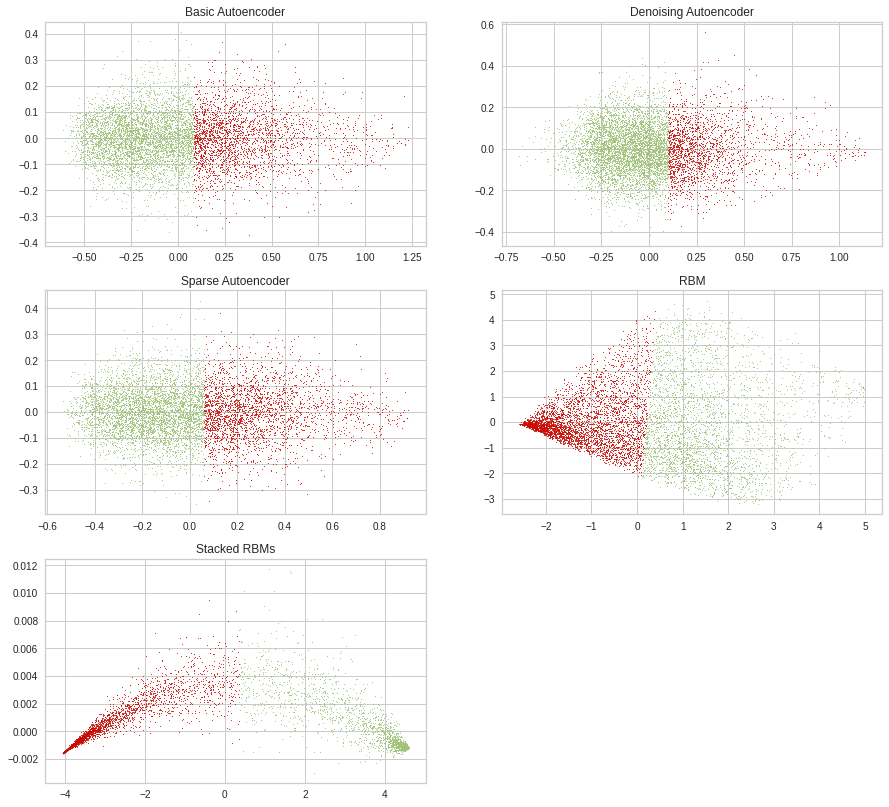

In [ ]:
visualization_clusters_models(2,clustering_method='K-means',visualization_method='PCA')  # cluster the data into 2 groups by K-means and visualize the clusters by PCA

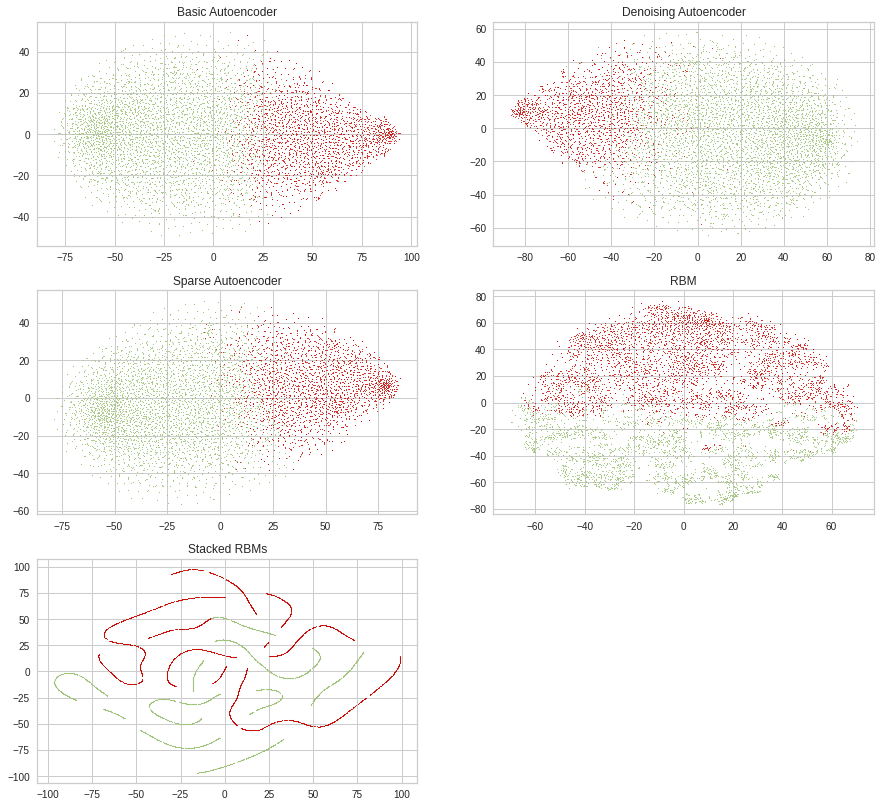

In [ ]:
visualization_clusters_models(2,clustering_method='K-means',visualization_method='T-SNE')  # cluster the data into 2 groups by K-means and visualize the clusters by TSNE